<a href="https://colab.research.google.com/github/LinanaLukina/codespaces-blank/blob/main/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B8_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%82%D1%80%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%B8%D0%BB%D0%BB%D1%8E%D1%81%D1%82%D1%80%D0%B8%D1%80%D1%83%D1%8E%D1%89%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BC%D0%B1%D0%B8%D0%BD%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Математическая модель комбинаторных формул**

In [ ]:
import itertools
import matplotlib.pyplot as plt
import math

def Model(n,k,a):
  # Сформируем список элементов из n
  r=[]
  N=[]
  for i in range(1,n+1):
    N.append(i)
  if a==1:
    #Перестановки P=n! Посчитаем вручную все перестановки и запишем результат
      c=0
      for i in itertools.permutations(N,n):
          c+=1
          r.append(i)

      print('Количество перестановок равно:',c)
      #Посчитаем перестановки с помощью комбинаторной формулы и тоже напишем результат
      C=math.factorial(n)
      #Сравним:
      print(f'Результаты сравнения вычислений : {c==C}')
      print(r)
  if a==2.1:
    #Размещения без повторений A=n!/(n-k)!
      c1=0
      for i in itertools.permutations(N,k):
          c1+=1
          r.append(i)
      print('Количество размещений равно:',c1)
      C1=math.factorial(n)/math.factorial(n-k)
      #Сравним:
      print(f'Результаты сравнения вычислений : {c1==C1}')
  if a==2.2:
    #Размещения с повторениями A=n**k
      c=0
      for res in itertools.product(N, repeat=k):

        c+=1
      print('Количество размещений равно:',c)
  if a==3:
      #Сочетания C=n!/(n-k)!*k!
      c=0
      for res in itertools.combinations(N, k):
        c+=1
      print('Количество сочетаний равно:',c)
      #Посчитаем перестановки с помощью комбинаторной формулы и тоже напишем результат
      C=math.factorial(n)/((math.factorial(n-k))*math.factorial(k))
      #Сравним:
      print(f'Результаты сравнения вычислений : {c==C}')

print('Последний аргумент функции Model отвечает за следующее:\n 1 - Перестановки  \n 2.1 - Размещения без повторений  \n 2.2 - Размещения с повторениями  \n 3 - Сочетания')
Model(5,2,3)

Последний аргумент функции Model отвечает за следующее:
 1 - Перестановки  
 2.1 - Размещения без повторений  
 2.2 - Размещения с повторениями  
 3 - Сочетания
Количество сочетаний равно: 10
Результаты сравнения вычислений : True


По конкретному типу задач построить граф, по графу построить интерактив перемещений вариаций.
Посмотреть задачу про формулу фибоначи и что то сделать.

Посмотреть график выше в виде гистограммы

# **Визуализация задач в виде дерева**

# **Дерево формулы сочетаний**

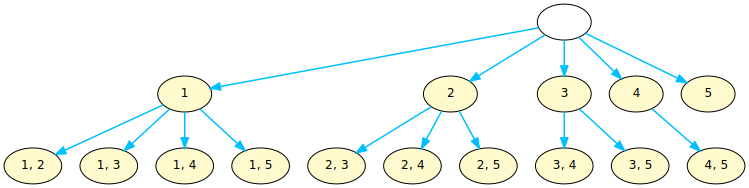

In [ ]:
from graphviz import Digraph

def build_tree(n, k):
    g = Digraph()

    def add_node(pos, remaining, curr_comb):
        if len(curr_comb) == k:
            node_label = ', '.join([str(x) for x in curr_comb])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            return

        if not curr_comb:
            sub_remaining = remaining[:]
        else:
            sub_remaining = remaining[remaining.index(curr_comb[-1])+1:]

        for i, el in enumerate(sub_remaining):
            new_comb = curr_comb + [el]
            node_label = ', '.join([str(x) for x in new_comb])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            g.edge(', '.join([str(x) for x in curr_comb]), node_label, color='deepskyblue', penwidth='1.5')
            add_node(pos+1, sub_remaining, new_comb)

    add_node(1, list(range(1, n+1)), [])
    return g


build_tree(5, 2)


# **Дерево формулы перестановок**

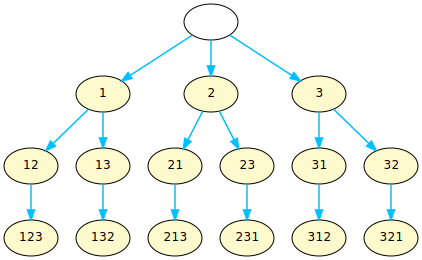

In [ ]:
from graphviz import Digraph

def build_tree(n):
    g = Digraph()

    def add_node(pos, remaining, curr_perm):
        if len(curr_perm) == n:
            node_label = ''.join([str(x) for x in curr_perm])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            return

        for i, el in enumerate(remaining):
            new_perm = curr_perm + [el]
            node_label = ''.join([str(x) for x in new_perm])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            g.edge(''.join([str(x) for x in curr_perm]), node_label, color='deepskyblue', penwidth='1.5')
            add_node(pos+1, remaining[0:i]+remaining[i+1:], new_perm)

    add_node(1, list(range(1, n+1)), [])
    return g


build_tree(3)


# **Дерево для формулы размещение без повторений**

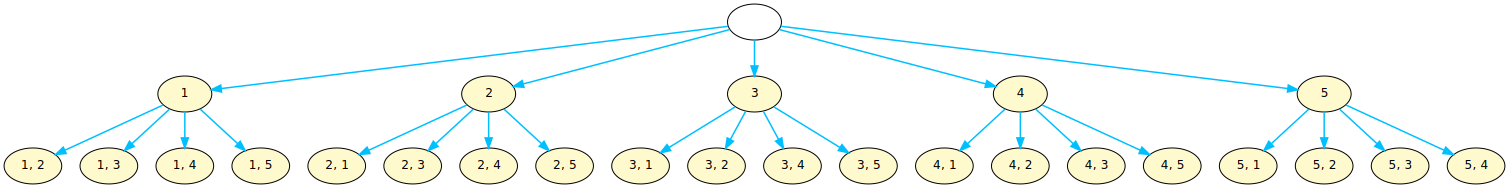

In [ ]:
from graphviz import Digraph

def build_tree(n, k):
    g = Digraph()

    def add_node(pos, remaining, curr_arr):
        if len(curr_arr) == k:
            node_label = ', '.join([str(x) for x in curr_arr])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            return

        for i, el in enumerate(remaining):
            new_arr = curr_arr + [el]
            node_label = ', '.join([str(x) for x in new_arr])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            g.edge(', '.join([str(x) for x in curr_arr]), node_label, color='deepskyblue', penwidth='1.5')
            add_node(pos+1, remaining[0:i]+remaining[i+1:], new_arr)

    add_node(1, list(range(1, n+1)), [])
    return g


build_tree(5, 2)


# **Дерево для формулы размещение с повторениями**

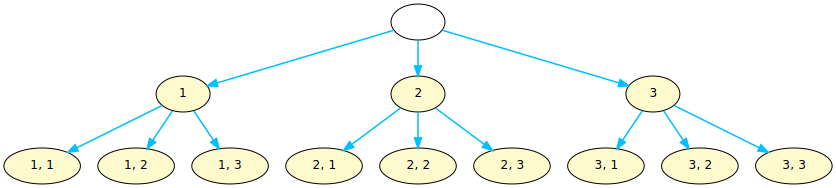

In [ ]:
from graphviz import Digraph

def build_tree(n, k):
    g = Digraph()

    def add_node(pos, curr_arr):
        if len(curr_arr) == k:
            node_label = ', '.join([str(x) for x in curr_arr])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            return

        for i in range(1, n+1):
            new_arr = curr_arr + [i]
            node_label = ', '.join([str(x) for x in new_arr])
            g.node(node_label, fontname='Verdana', fontsize='12', shape='oval', style='filled', fillcolor='lemonchiffon')
            g.edge(', '.join([str(x) for x in curr_arr]), node_label, color='deepskyblue', penwidth='1.5')
            add_node(pos+1, new_arr)

    add_node(1, [])
    return g


build_tree(3, 2)


# **Графы**


# **Граф для формулы сочетний**

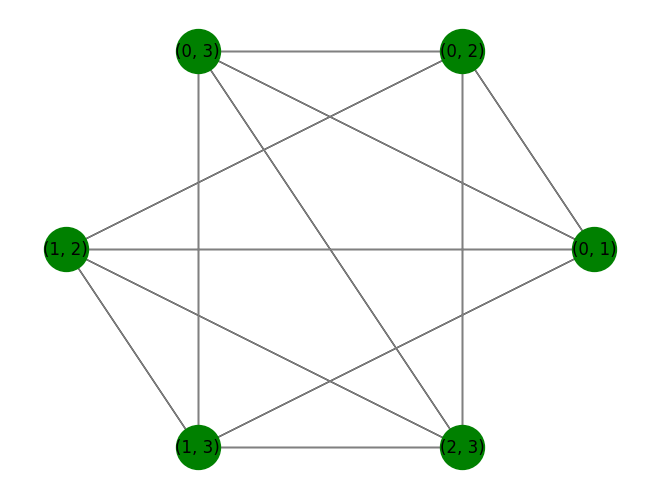

In [ ]:
import networkx as nx
from itertools import combinations

def combination_graph(n, k):
    # Создаем пустой граф
    G = nx.Graph()

    # Создаем список вершин - сочетаний из n по k
    nodes = list(combinations(range(n), k))

    # Добавляем вершины в граф
    G.add_nodes_from(nodes)

    # Добавляем ребра между сочетаниями
    for i, u in enumerate(nodes):
        for j in range(i+1, len(nodes)):
            v = nodes[j]
            if len(set(u) & set(v)) == k-1:
                G.add_edge(u, v)

    # Рисуем граф
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='g')
    nx.draw_networkx_edges(G, pos, edge_color='grey')

# Пример использования
combination_graph(4, 2)

# **Граф для формулы перестановок**

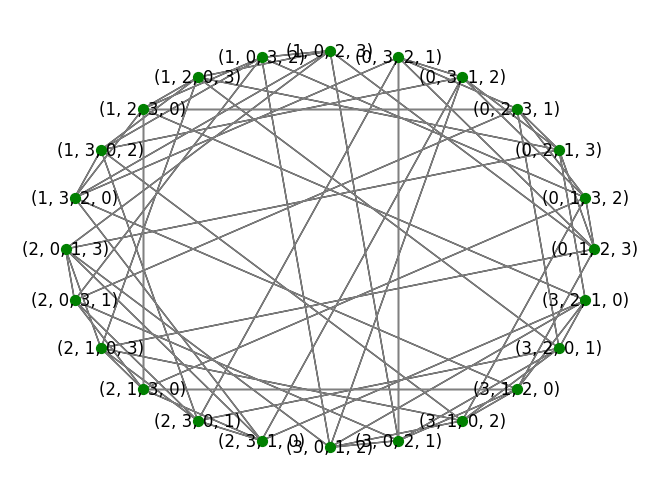

In [ ]:
import networkx as nx
from itertools import permutations

def permutation_graph(n):
    # Создаем пустой граф
    G = nx.Graph()

    # Создаем список вершин - перестановок из n элементов
    nodes = list(permutations(range(n)))

    # Добавляем вершины в граф
    G.add_nodes_from(nodes)

    # Добавляем ребра между перестановками
    for i, u in enumerate(nodes):
        for j in range(i+1, len(nodes)):
            v = nodes[j]
            k = sum([1 if u[x] != v[x] else 0 for x in range(n)])
            if k == 2:
                G.add_edge(u, v)

    # Рисуем граф
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=50, node_color='g')
    nx.draw_networkx_edges(G, pos, edge_color='grey')

# Пример использования
permutation_graph(4)

# **Размещения с повторениями**

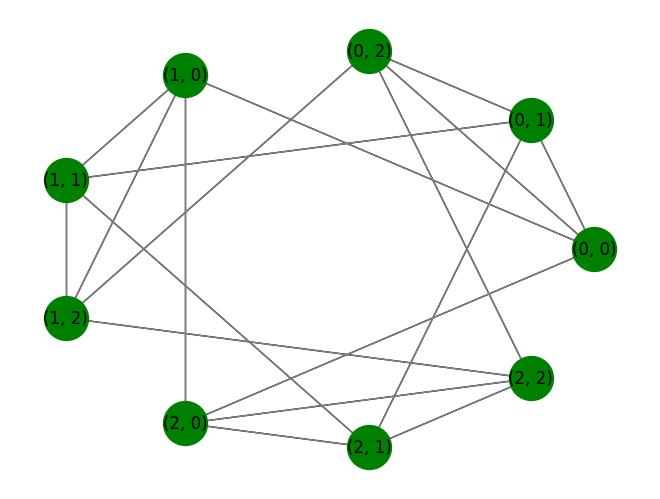

In [ ]:
import networkx as nx
from itertools import product

def get_neighbors(u, n):
    # Функция, возвращающая все "соседние" размещения с повторениями для u
    neighbors = []
    for i in range(len(u)):
        for j in range(n):
            if j != u[i]:
                neighbors.append(u[:i] + (j,) + u[i+1:])
    return neighbors

def arrangement_with_repetitions_graph(n, k):
    # Создаем пустой граф
    G = nx.Graph()

    # Создаем список вершин - размещений с повторениями из n элементов по k
    nodes = list(product(range(n), repeat=k))

    # Добавляем вершины в граф
    G.add_nodes_from(nodes)

    # Добавляем ребра между размещениями
    for i, u in enumerate(nodes):
        neighbors = get_neighbors(u, n)
        for v in neighbors:
            G.add_edge(u, v)

    # Рисуем граф
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='g')
    nx.draw_networkx_edges(G, pos, edge_color='grey')

# Пример использования
arrangement_with_repetitions_graph(3, 2)

# **Размещение без повторений**

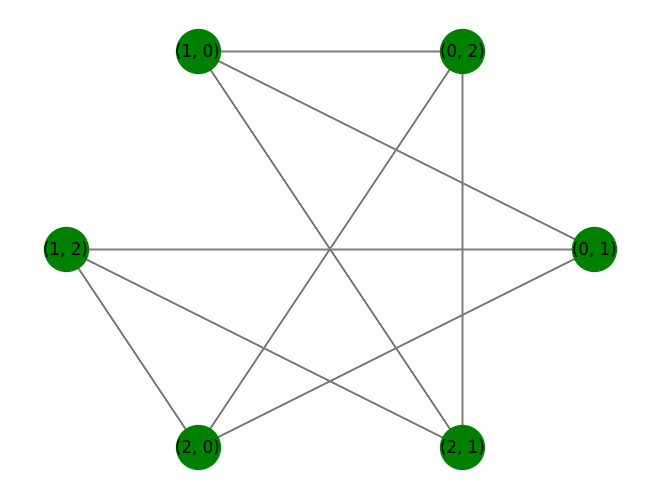

In [ ]:
import networkx as nx
from itertools import permutations

def arrangement_without_repetitions_graph(n, k):
    # Создаем пустой граф
    G = nx.Graph()

    # Создаем список вершин - размещений без повторений из n элементов по k
    nodes = list(permutations(range(n), k))

    # Добавляем вершины в граф
    G.add_nodes_from(nodes)

    # Добавляем ребра между размещениями
    for i, u in enumerate(nodes):
        for j in range(i+1, len(nodes)):
            v = nodes[j]
            k = sum([1 if u[x] != v[x] else 0 for x in range(len(u))])
            if k == 2:
                G.add_edge(u, v)

    # Рисуем граф
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='g')
    nx.draw_networkx_edges(G, pos, edge_color='grey')

# Пример использования
arrangement_without_repetitions_graph(3, 2)

# **Задача**

Визуализация вариантов игры:

In [ ]:
import graphviz as gv

# создаем граф
G = gv.Digraph(format='png')

# добавляем узлы
G.node("начало", shape="box")
G.node("ход 1", shape="box")
G.node("ход 2", shape="box")
G.node("ход 3", shape="box")
G.node("вариант 1", shape="ellipse", style="filled", color="gray")
G.node("вариант 2", shape="ellipse", style="filled", color="gray")
G.node("вариант 1.1", shape="ellipse")
G.node("вариант 1.2", shape="ellipse")
G.node("вариант 2.1", shape="ellipse")
G.node("вариант 2.2", shape="ellipse")

# добавляем связи
G.edge("начало", "ход 1")
G.edge("начало", "ход 2")
G.edge("начало", "ход 3")
G.edge("ход 1", "вариант 1")
G.edge("ход 1", "вариант 2")
G.edge("ход 2", "вариант 2")
G.edge("ход 3", "вариант 2")
G.edge("вариант 1", "вариант 1.1")
G.edge("вариант 1", "вариант 1.2")
G.edge("вариант 2", "вариант 2.1")
G.edge("вариант 2", "вариант 2.2")

# сохраняем файл и открываем его
G.render('game', view=True)

'game.png'

# **Метод случайного блуждания**

# **Пример решения задачи с помощью случайного блуждания**


Ответ 391


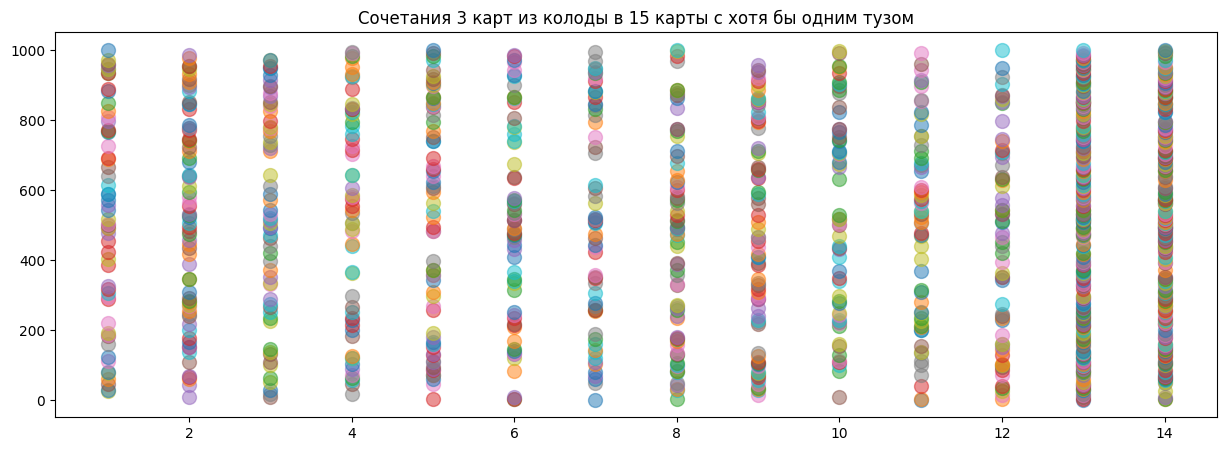

In [ ]:
import random
import matplotlib.pyplot as plt

# Генерация случайного сочетания 3 карт из колоды в 52 карты
def generate_combination():
    return random.sample(range(1, 15), 3)

# Проверка наличия хотя бы одного туза в сочетании
def has_ace(cards):
    return 1 in [card//13 for card in cards]

# Количество попыток генерации сочетаний
num_trials = 1000

# Настройки графика
plt.figure(figsize=(15, 5))

# Список для хранения найденных сочетаний
ace_combinations = []
c=0
for i in range(num_trials):
    comb = generate_combination()
    if has_ace(comb):
        ace_combinations.append(comb)
        plt.plot([comb[0], comb[1], comb[2]], [i+1]*3, 'o', markersize=10, alpha=0.5)
        c+=1
print('Ответ', c)
plt.title('Сочетания 3 карт из колоды в 15 карты с хотя бы одним тузом')
plt.show()

Задача: Какова вероятность, достать 3 карты из 52, при том, что среди этих трех карт был туз?

Чтобы решить задачу методом случайного блуждания, мы можем сделать следующее:

Создаем функцию, которая будет генерировать случайный список из 3 карт.

Запускаем эту функцию множество раз (например, 1000) и подсчитываем, сколько из этих списков содержат хотя бы одну карту туз.

Делим число полученных "хороших" списков на общее число генерируемых списков и умножаем на 100, чтобы получить процент вероятности.

Дополнительно можно визуализировать процесс генерации случайных списков и количество "хороших" списков.

Вероятность выбрать 3 карты, среди которых есть хотя бы одна карта туз: 20.70%


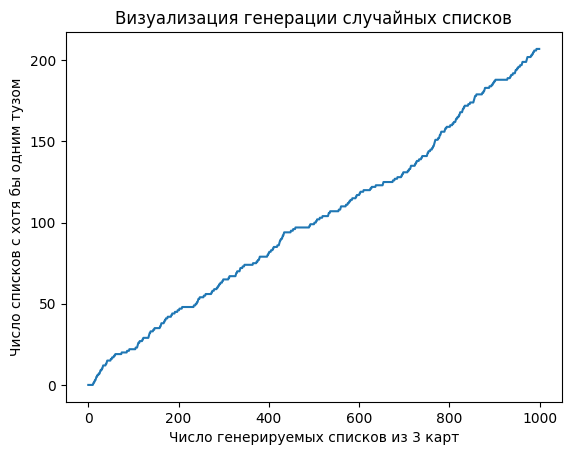

In [ ]:
import random
import matplotlib.pyplot as plt


def generate_hand(num_cards):
    """Генерирует случайный список из num_cards карт"""
    deck = ['2♥', '3♥', '4♥', '5♥', '6♥', '7♥', '8♥', '9♥', '10♥', 'J♥', 'Q♥', 'K♥', 'A♥',
            '2♦', '3♦', '4♦', '5♦', '6♦', '7♦', '8♦', '9♦', '10♦', 'J♦', 'Q♦', 'K♦', 'A♦',
            '2♠', '3♠', '4♠', '5♠', '6♠', '7♠', '8♠', '9♠', '10♠', 'J♠', 'Q♠', 'K♠', 'A♠',
            '2♣', '3♣', '4♣', '5♣', '6♣', '7♣', '8♣', '9♣', '10♣', 'J♣', 'Q♣', 'K♣', 'A♣']
    return random.sample(deck, num_cards)


def calculate_probability(num_hands):
    """Рассчитывает вероятность того, что из num_hands случайных списков из 3 карт хотя бы у одного есть туз"""
    num_hands_with_ace = 0
    x = []
    y = []
    for i in range(num_hands):
        hand = generate_hand(3)
        if 'A♥' in hand or 'A♦' in hand or 'A♠' in hand or 'A♣' in hand:
            num_hands_with_ace += 1
        x.append(i)
        y.append(num_hands_with_ace)
    probability = (num_hands_with_ace / num_hands) * 100
    return probability, x, y


# Рассчитываем вероятность
probability, x, y = calculate_probability(1000)
print(f"Вероятность выбрать 3 карты, среди которых есть хотя бы одна карта туз: {probability:.2f}%")

# Визуализируем процесс генерации случайных списков и количество хороших списков
plt.plot(x, y)
plt.xlabel('Число генерируемых списков из 3 карт')
plt.ylabel('Число списков с хотя бы одним тузом')
plt.title('Визуализация генерации случайных списков')
plt.show()

Примером более простой задачи, которую можно решить методом случайного блуждания, может быть задача о подбрасывании монеты. Например, мы хотим выяснить, сколько раз нужно подбросить монету, чтобы выпало два орла подряд.

Для решения этой задачи можно написать программу, которая будет генерировать случайные последовательности монеток до тех пор, пока не появится две подряд выпавшие "орла".

Для того, чтобы выпали два орла подряд, потребовалось 10 подбрасываний монеты.


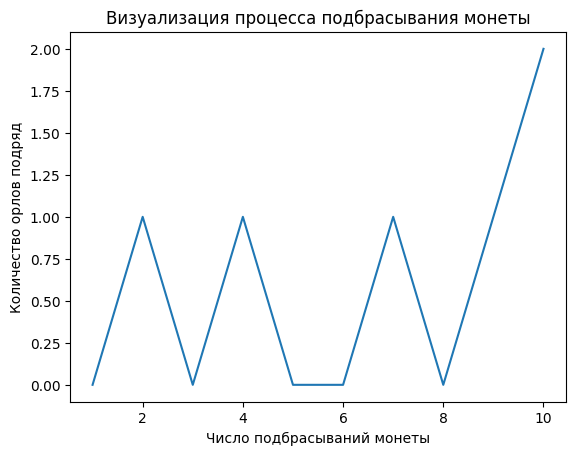

In [ ]:
import random
import matplotlib.pyplot as plt

# Определяем массивы для графика
x = []
y = []

# Определяем счетчик числа подбрасываний и число двух орлов подряд
count = 0
num_heads_in_a_row = 0

# Пока не выпадут два орла подряд, продолжаем подбрасывать монету
while num_heads_in_a_row < 2:
    toss = random.randint(0, 1)   # 0 - орел, 1 - решка

    if toss == 0:
        num_heads_in_a_row += 1    # Увеличиваем счетчик двух орлов подряд
    else:
        num_heads_in_a_row = 0     # Если выпала решка, обнуляем счетчик

    count += 1                    # Увеличиваем счетчик подбрасываний

    # Добавляем значения для графика
    x.append(count)
    y.append(num_heads_in_a_row)

# Выводим результат
print("Для того, чтобы выпали два орла подряд, потребовалось {0} подбрасываний монеты.".format(count))

# Строим график
plt.plot(x, y)
plt.xlabel('Число подбрасываний монеты')
plt.ylabel('Количество орлов подряд')
plt.title('Визуализация процесса подбрасывания монеты')
plt.show()

# **Итоговая задача**

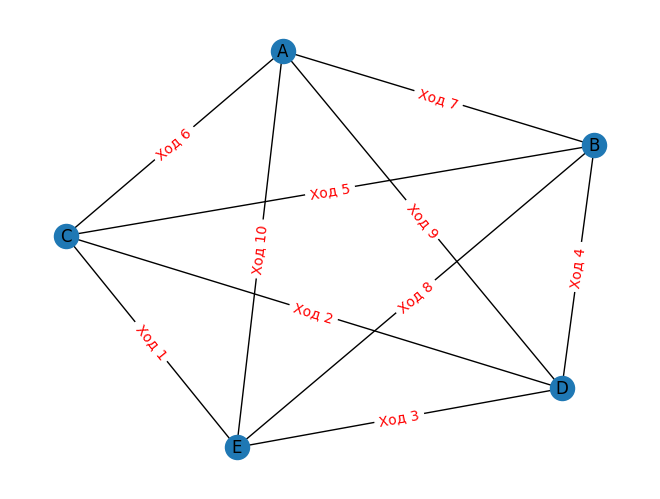

[('C', 'E'), ('C', 'D'), ('D', 'E'), ('B', 'D'), ('B', 'C'), ('A', 'C'), ('A', 'B'), ('B', 'E'), ('A', 'D'), ('A', 'E')]


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф, где вершины - это команды, а ребра - это матчи
teams = ['A', 'B', 'C', 'D', 'E']
matches = []

for i in range(len(teams)):
    for j in range(i+1, len(teams)):
        matches.append((teams[i], teams[j]))

# Используем метод случайного блуждания для распределения команд на матчи
random.shuffle(teams)
current_team = teams[0]
matches_assigned = []
while len(matches_assigned) < len(matches):
    next_team = random.choice(list(set(teams) - set([current_team])))
    match = tuple(sorted([current_team, next_team]))
    if match not in matches_assigned:
        matches_assigned.append(match)
    current_team = next_team

# Создаем граф с помощью библиотеки networkx
G = nx.Graph()
G.add_nodes_from(teams)
G.add_edges_from(matches_assigned)

# Создаем список ходов по графу
moves = matches_assigned

# Создаем словарь с подписями для каждого ребра
labels = {}
for i, move in enumerate(moves):
    labels[move] = f"Ход {i+1}"

# Рисуем граф с подписями на ребрах
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
plt.show()
print(matches_assigned)